In [ ]:
!pip install pygame

In [1]:
from models.DeepCNNModel import DeepCNNModel
from models.RandomModel import RandomModel
from models.HeuristicModel import HeuristicModel
from train_cnn import train_deepcnn_model
import fsutils as fs

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
# training params
FRAME_SKIP = 4
UPDATE_FREQ = FRAME_SKIP
TARGET_NET_SYNC_FREQ = 1000
MAX_EPS = 250
MAX_STEPS_PER_EP = 1000

# CNN hyperparams
# since we still want it to explore but don't want it to forget everything, start epsilon lower
TAU = 4
GAMMA = 0.95
EPS_START = 0.33
EPS_END = 0.05
EPS_DECAY_WINDOW = 50
REPLAY_BUF_CAPACITY = 10000
REPLAY_BUF_PREFILL_AMT = 2000
LR = 0.001
DOWNSAMPLE_SIZE = (112, 112)
BATCH_SIZE = 32

NUM_RAND_ADVERSARIES = 3
NUM_HEURISTIC_ADVERSARIES = 3

In [6]:
cnn_model = DeepCNNModel(tau=TAU, gamma=GAMMA, eps_start=EPS_START, eps_end=EPS_END,
                            eps_decay_window=EPS_DECAY_WINDOW, replay_buf_capacity=REPLAY_BUF_CAPACITY,
                            replay_buf_prefill_amt=REPLAY_BUF_PREFILL_AMT, lr=LR,
                            downsample_size=DOWNSAMPLE_SIZE, batch_size=BATCH_SIZE)
cnn_model_name = 'dqn_cnn_add_enemies_to_trained_food_250ep'

# loading trained model but getting rid of replay buf (which doesn't have enemies)
saved_net = fs.load_net_from_device(cnn_model.net, 'important/dqn_cnn_500ep_v2', 'cpu')
cnn_model.net = saved_net
cnn_model.sync_target_net()

adversary_models = []
for i in range(NUM_RAND_ADVERSARIES):
    adversary_models.append(RandomModel(min_steps=5, max_steps=10))
for i in range(NUM_HEURISTIC_ADVERSARIES):
    adversary_models.append(HeuristicModel())

Filling replay buffer to 20.0% capacity...
Replay buffer filled with 2000 samples!
Beginning training...
=== Starting Episode 0 ===
Step 0
Ep Score: 121.4993 | Mean Score: 121.4993 | Steps Survived: 199 | Mean Steps Survived: 199.00
Mean Ep Loss: 0.0202 | Ep Reward: -57.2884 | Mean Reward: 121.4993
Model has been training for 6.7698 minutes.
=== Starting Episode 1 ===
Step 250
Ep Score: 4.9258 | Mean Score: 63.2125 | Steps Survived: 58 | Mean Steps Survived: 128.50
Mean Ep Loss: 41.2419 | Ep Reward: 4.4569 | Mean Reward: 63.2125
Model has been training for 7.0422 minutes.
=== Starting Episode 2 ===
Ep Score: 2.9917 | Mean Score: 43.1389 | Steps Survived: 3 | Mean Steps Survived: 86.67
Mean Ep Loss: 124.7337 | Ep Reward: 2.9831 | Mean Reward: 43.1389
Model has been training for 7.0582 minutes.
=== Starting Episode 3 ===
Step 500
Step 750
Step 1000
Step 1250
Ep Score: 29.1915 | Mean Score: 39.6521 | Steps Survived: 1000 | Mean Steps Survived: 315.00
Mean Ep Loss: 5.1360 | Ep Reward: 25.7

Ep Score: 12.1278 | Mean Score: 42.3608 | Steps Survived: 202 | Mean Steps Survived: 592.60
Mean Ep Loss: 3.2441 | Ep Reward: 11.8702 | Mean Reward: 42.3608
Model has been training for 90.9056 minutes.
=== Starting Episode 33 ===
Step 17750
Step 18000
Step 18250
Step 18500
Ep Score: 17.2609 | Mean Score: 40.8526 | Steps Survived: 1000 | Mean Steps Survived: 592.60
Mean Ep Loss: 3.7260 | Ep Reward: 14.7206 | Mean Reward: 40.8526
Model has been training for 95.4986 minutes.
=== Starting Episode 34 ===
Step 18750
Step 19000
Step 19250
Ep Score: 11.4095 | Mean Score: 25.9388 | Steps Survived: 695 | Mean Steps Survived: 562.10
Mean Ep Loss: 1.7665 | Ep Reward: 8.3466 | Mean Reward: 25.9388
Model has been training for 98.7905 minutes.
=== Starting Episode 35 ===
Step 19500
Ep Score: 172.4506 | Mean Score: 43.0847 | Steps Survived: 195 | Mean Steps Survived: 578.30
Mean Ep Loss: 0.8636 | Ep Reward: -87.7797 | Mean Reward: 43.0847
Model has been training for 99.6942 minutes.
=== Starting Episo

Step 31000
Step 31250
Step 31500
Step 31750
Ep Score: 208.2155 | Mean Score: 26.1756 | Steps Survived: 1000 | Mean Steps Survived: 371.00
Mean Ep Loss: 3.1437 | Ep Reward: 207.8039 | Mean Reward: 26.1756
Model has been training for 157.1995 minutes.
=== Starting Episode 67 ===
Ep Score: 0.0000 | Mean Score: 25.9172 | Steps Survived: 8 | Mean Steps Survived: 360.60
Mean Ep Loss: 1.1760 | Ep Reward: -0.0406 | Mean Reward: 25.9172
Model has been training for 157.2377 minutes.
=== Starting Episode 68 ===
Ep Score: 1.9918 | Mean Score: 25.9175 | Steps Survived: 8 | Mean Steps Survived: 353.20
Mean Ep Loss: 1.1220 | Ep Reward: 1.9414 | Mean Reward: 25.9175
Model has been training for 157.2763 minutes.
=== Starting Episode 69 ===
Step 32000
Step 32250
Step 32500
Step 32750
Ep Score: 25.7746 | Mean Score: 27.4977 | Steps Survived: 1000 | Mean Steps Survived: 353.20
Mean Ep Loss: 4.2942 | Ep Reward: 25.5829 | Mean Reward: 27.4977
Model has been training for 162.1379 minutes.
=== Starting Episod

Step 47000
Step 47250
Step 47500
Step 47750
Ep Score: 183.2849 | Mean Score: 129.6402 | Steps Survived: 1000 | Mean Steps Survived: 625.00
Mean Ep Loss: 11.9739 | Ep Reward: 179.2968 | Mean Reward: 129.6402
Model has been training for 237.1409 minutes.
=== Starting Episode 100 ===
Step 48000
Step 48250
Ep Score: 130.7645 | Mean Score: 141.2441 | Steps Survived: 423 | Mean Steps Survived: 644.80
Mean Ep Loss: 20.8461 | Ep Reward: -65.6778 | Mean Reward: 141.2441
Model has been training for 239.3028 minutes.
=== Starting Episode 101 ===
Step 48500
Ep Score: 11.5219 | Mean Score: 141.3321 | Steps Survived: 333 | Mean Steps Survived: 578.10
Mean Ep Loss: 16.2064 | Ep Reward: 10.1549 | Mean Reward: 141.3321
Model has been training for 240.9066 minutes.
=== Starting Episode 102 ===
Ep Score: 1.8959 | Mean Score: 140.0447 | Steps Survived: 26 | Mean Steps Survived: 500.00
Mean Ep Loss: 4.3723 | Ep Reward: 1.8624 | Mean Reward: 140.0447
Model has been training for 241.0339 minutes.
=== Startin

Ep Score: 0.0000 | Mean Score: 28.1528 | Steps Survived: 103 | Mean Steps Survived: 410.70
Mean Ep Loss: 3.1447 | Ep Reward: -1.0758 | Mean Reward: 28.1528
Model has been training for 302.4316 minutes.
=== Starting Episode 133 ===
Step 61500
Step 61750
Step 62000
Step 62250
Ep Score: 16.2221 | Mean Score: 29.1341 | Steps Survived: 1000 | Mean Steps Survived: 410.70
Mean Ep Loss: 1.4783 | Ep Reward: 14.7850 | Mean Reward: 29.1341
Model has been training for 307.4641 minutes.
=== Starting Episode 134 ===
Step 62500
Ep Score: 3.9903 | Mean Score: 29.1890 | Steps Survived: 195 | Mean Steps Survived: 417.30
Mean Ep Loss: 1.3904 | Ep Reward: 2.0598 | Mean Reward: 29.1890
Model has been training for 308.4079 minutes.
=== Starting Episode 135 ===
Step 62750
Ep Score: 5.9882 | Mean Score: 29.6200 | Steps Survived: 156 | Mean Steps Survived: 429.00
Mean Ep Loss: 1.1070 | Ep Reward: 5.2738 | Mean Reward: 29.6200
Model has been training for 309.1616 minutes.
=== Starting Episode 136 ===
Step 63000

Step 73250
Ep Score: 114.8024 | Mean Score: 63.2659 | Steps Survived: 213 | Mean Steps Survived: 346.50
Mean Ep Loss: 10.6374 | Ep Reward: -73.8381 | Mean Reward: 63.2659
Model has been training for 361.3005 minutes.
=== Starting Episode 167 ===
Step 73500
Step 73750
Step 74000
Step 74250
Ep Score: 26.5238 | Mean Score: 40.8777 | Steps Survived: 857 | Mean Steps Survived: 334.30
Mean Ep Loss: 5.7929 | Ep Reward: 25.2592 | Mean Reward: 40.8777
Model has been training for 365.4631 minutes.
=== Starting Episode 168 ===
Ep Score: 4.4779 | Mean Score: 40.9369 | Steps Survived: 77 | Mean Steps Survived: 333.80
Mean Ep Loss: 1.8005 | Ep Reward: 4.4558 | Mean Reward: 40.9369
Model has been training for 365.8361 minutes.
=== Starting Episode 169 ===
Step 74500
Step 74750
Step 75000
Step 75250
Ep Score: 76.3508 | Mean Score: 48.5720 | Steps Survived: 1000 | Mean Steps Survived: 433.50
Mean Ep Loss: 9.8940 | Ep Reward: 76.0250 | Mean Reward: 48.5720
Model has been training for 370.3874 minutes.
=

Ep Score: 2.7295 | Mean Score: 27.6759 | Steps Survived: 54 | Mean Steps Survived: 277.30
Mean Ep Loss: 8.9657 | Ep Reward: 2.7185 | Mean Reward: 27.6759
Model has been training for 416.2962 minutes.
=== Starting Episode 201 ===
Step 85000
Step 85250
Step 85500
Step 85750
Ep Score: 14.2632 | Mean Score: 29.0031 | Steps Survived: 1000 | Mean Steps Survived: 375.30
Mean Ep Loss: 6.1607 | Ep Reward: 13.8801 | Mean Reward: 29.0031
Model has been training for 421.3051 minutes.
=== Starting Episode 202 ===
Step 86000
Ep Score: 3.5403 | Mean Score: 9.6393 | Steps Survived: 98 | Mean Steps Survived: 285.10
Mean Ep Loss: 18.1339 | Ep Reward: 3.4598 | Mean Reward: 9.6393
Model has been training for 421.7866 minutes.
=== Starting Episode 203 ===
Ep Score: 8.4680 | Mean Score: 9.9344 | Steps Survived: 79 | Mean Steps Survived: 276.00
Mean Ep Loss: 6.6666 | Ep Reward: 8.4124 | Mean Reward: 9.9344
Model has been training for 422.1808 minutes.
=== Starting Episode 204 ===
Step 86250
Ep Score: 2.0000 

Step 98750
Step 99000
Step 99250
Step 99500
Ep Score: 20.4492 | Mean Score: 47.9092 | Steps Survived: 1000 | Mean Steps Survived: 621.00
Mean Ep Loss: 6.4182 | Ep Reward: 18.1092 | Mean Reward: 47.9092
Model has been training for 480.6734 minutes.
=== Starting Episode 234 ===
Step 99750
Ep Score: 14.9993 | Mean Score: 48.0025 | Steps Survived: 276 | Mean Steps Survived: 548.60
Mean Ep Loss: 11.1401 | Ep Reward: 14.1923 | Mean Reward: 48.0025
Model has been training for 481.9744 minutes.
=== Starting Episode 235 ===
Step 100000
Step 100250
Step 100500
Step 100750
Ep Score: 252.0651 | Mean Score: 71.7715 | Steps Survived: 1000 | Mean Steps Survived: 597.80
Mean Ep Loss: 7.7661 | Ep Reward: -62.4368 | Mean Reward: 71.7715
Model has been training for 487.0747 minutes.
=== Starting Episode 236 ===
Ep Score: 0.9939 | Mean Score: 71.5955 | Steps Survived: 44 | Mean Steps Survived: 595.30
Mean Ep Loss: 41.9889 | Ep Reward: 0.7341 | Mean Reward: 71.5955
Model has been training for 487.2982 minu

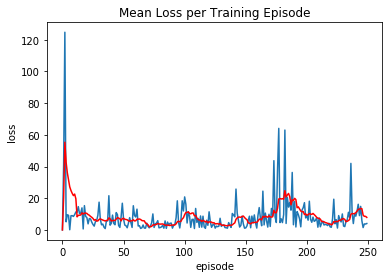

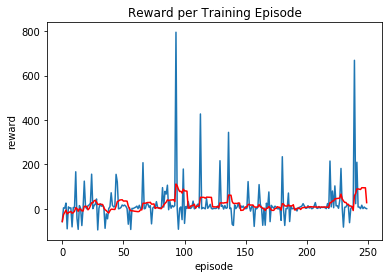

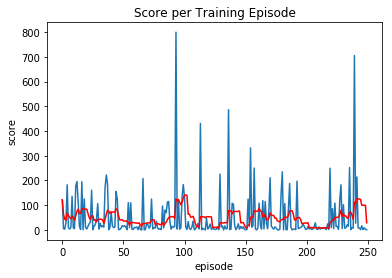

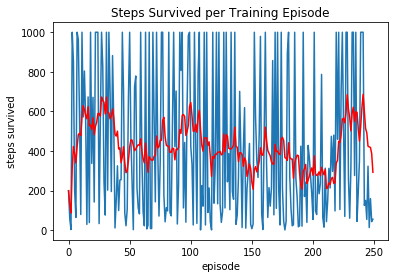

In [7]:
train_deepcnn_model(cnn_model, cnn_model_name, adversary_models, frame_skip=FRAME_SKIP, update_freq=UPDATE_FREQ,
                    target_net_sync_freq=TARGET_NET_SYNC_FREQ, max_eps=MAX_EPS, max_steps_per_ep=MAX_STEPS_PER_EP,
                    prefill_buffer=True)